In [1]:
import scanpy as sc


In [2]:
data_path = "/Volumes/T7/Informatik/BioInfoLab/data/filtered_feature_bc_matrix.h5"

adata = sc.read_10x_h5(data_path)


/Users/posonk/anaconda3/envs/bioInfoLab/lib/python3.11/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/posonk/anaconda3/envs/bioInfoLab/lib/python3.11/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [8]:
adata.var

,gene_ids,feature_types,genome
SAMD11,ENSG00000187634,Gene Expression,GRCh38
NOC2L,ENSG00000188976,Gene Expression,GRCh38
KLHL17,ENSG00000187961,Gene Expression,GRCh38
PLEKHN1,ENSG00000187583,Gene Expression,GRCh38
PERM1,ENSG00000187642,Gene Expression,GRCh38
...,...,...,...
TSPY1,ENSG00000258992,Gene Expression,GRCh38
USP9Y,ENSG00000114374,Gene Expression,GRCh38
DDX3Y,ENSG00000067048,Gene Expression,GRCh38
TMSB4Y,ENSG00000154620,Gene Expression,GRCh38


In [6]:
adata.obs

""
AAACAATCTACTAGCA-1
AAACACCAATAACTGC-1
AAACAGAGCGACTCCT-1
AAACAGCTTTCAGAAG-1
AAACAGGGTCTATATT-1
...
TTGTTGTGTGTCAAGA-1
TTGTTTCACATCCAGG-1
TTGTTTCATTAGTCTA-1
TTGTTTCCATACAACT-1


In [4]:
adata.var_names_make_unique()


In [5]:
sc.pp.filter_genes(adata, min_cells=3)
sc.pp.filter_cells(adata, min_genes=10)

In [6]:
adata

AnnData object with n_obs × n_vars = 3043 × 16259
    obs: 'n_genes'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells'

In [20]:
import numpy as np

# assume you've already loaded your data into `adata`
# and that .X is either a dense NumPy array or a sparse matrix

# 1. Check per‐cell total counts
cell_sums = np.asarray(adata.X.sum(axis=1)).flatten()
print(f"Per‐cell counts: min={cell_sums.min():.1f}, "
      f"median={np.median(cell_sums):.1f}, max={cell_sums.max():.1f}")


Per‐cell counts: min=2529.8, median=4940.9, max=5402.0


In [21]:
data_vals = adata.X.data if hasattr(adata.X, 'data') else adata.X.flatten()
is_integer = np.allclose(data_vals, np.round(data_vals), atol=1e-8)
print("All entries integer?" , is_integer)

All entries integer? False


In [22]:
# 3. Check for log1p‐transform
#    If log1p was applied, expm1(X) should recover (approximately) the original counts.
from scipy import sparse
if sparse.issparse(adata.X):
    recovered = np.expm1(adata.X.data)
    is_log1p = np.allclose(recovered, np.round(recovered), atol=1e-6)
else:
    recovered = np.expm1(adata.X)
    is_log1p = np.allclose(recovered, np.round(recovered), atol=1e-6)
print("Likely log1p‐transformed?", is_log1p)

Likely log1p‐transformed? False


In [10]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

In [23]:
adata

AnnData object with n_obs × n_vars = 3043 × 16259
    obs: 'n_genes', 'leiden', 'leiden_0.1', 'leiden_0.2', 'leiden_0.3', 'leiden_0.4', 'leiden_0.5', 'leiden_0.6', 'leiden_0.7', 'leiden_0.8', 'leiden_0.9', 'leiden_1.0'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells'
    uns: 'log1p', 'pca', 'neighbors', 'leiden', 'umap', 'leiden_colors', 'leiden_0.1', 'leiden_0.1_colors', 'leiden_0.2', 'leiden_0.2_colors', 'leiden_0.3', 'leiden_0.3_colors', 'leiden_0.4', 'leiden_0.4_colors', 'leiden_0.5', 'leiden_0.5_colors', 'leiden_0.6', 'leiden_0.6_colors', 'leiden_0.7', 'leiden_0.7_colors', 'leiden_0.8', 'leiden_0.8_colors', 'leiden_0.9', 'leiden_0.9_colors', 'leiden_1.0', 'leiden_1.0_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [12]:
sc.tl.pca(adata, svd_solver='arpack')


In [14]:
!conda install -c conda-forge leidenalg -y

Channels:
 - conda-forge
 - defaults
Platform: osx-arm64
doneecting package metadata (repodata.json): - 
doneing environment: / 

## Package Plan ##

  environment location: /Users/posonk/anaconda3/envs/bioInfoLab

  added / updated specs:
    - leidenalg


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    igraph-0.10.15             |       h3fe6531_1         1.2 MB  conda-forge
    leidenalg-0.10.2           |  py311h92babd0_0          82 KB  conda-forge
    libleidenalg-0.11.1        |       h1995070_0          81 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         1.4 MB

The following NEW packages will be INSTALLED:

  igraph             conda-forge/osx-arm64::igraph-0.10.15-h3fe6531_1 
  leidenalg          conda-forge/osx-arm64::leidenalg-0.10.2-py311h92babd0_0 
  libleidenalg       conda-forge/osx-

In [15]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=20)

In [16]:
sc.tl.leiden(adata, resolution=0.5)

/var/folders/87/7v73t28s4lgcqq34tmcbhmhw0000gn/T/ipykernel_16116/1771924308.py:1: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution=0.5)


In [17]:
sc.tl.umap(adata)


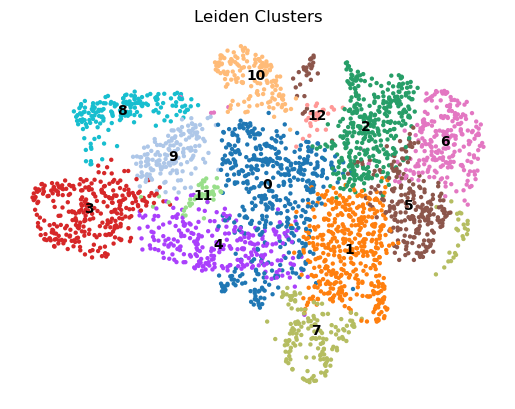

In [18]:
sc.pl.umap(adata, color='leiden', title='Leiden Clusters', legend_loc='on data', frameon=False)


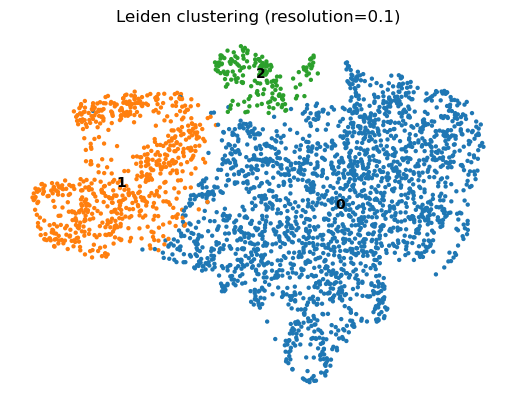

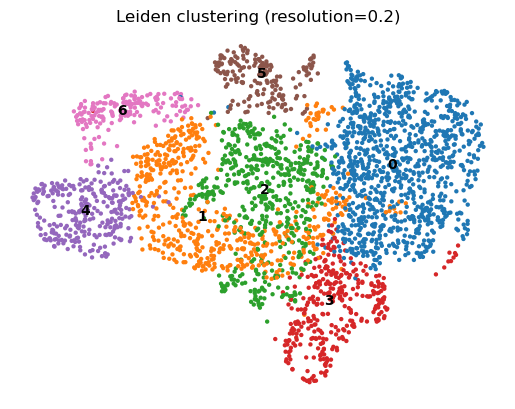

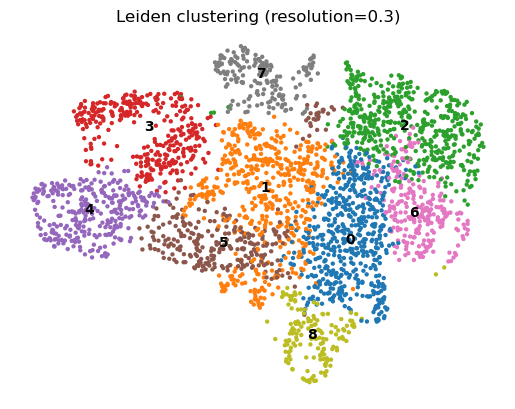

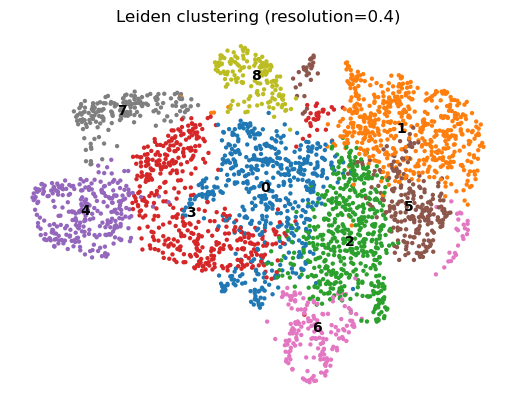

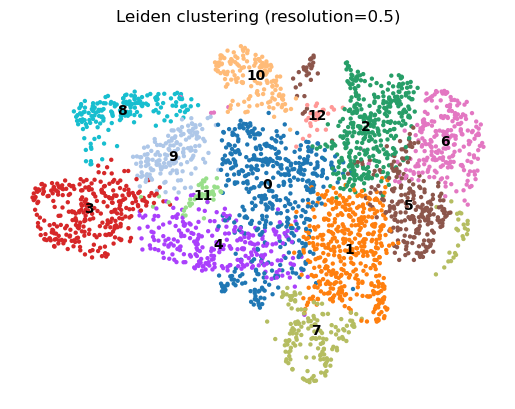

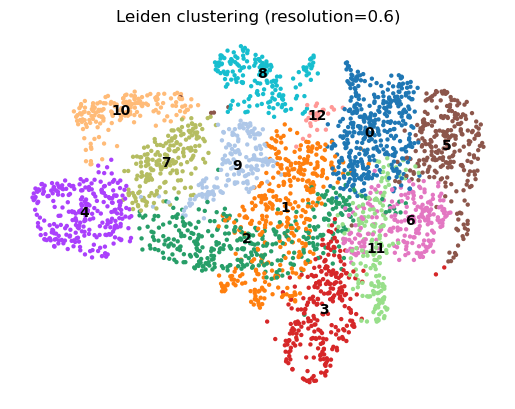

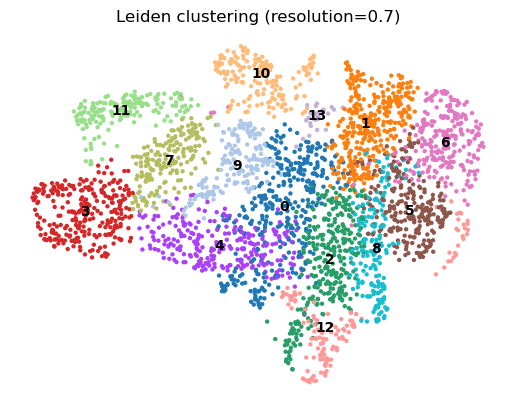

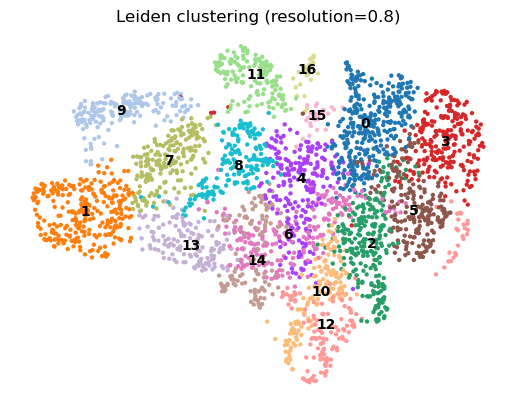

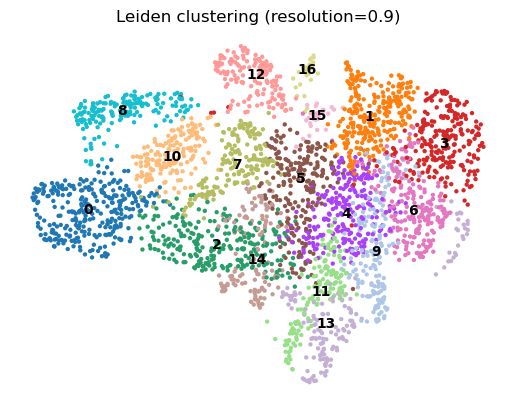

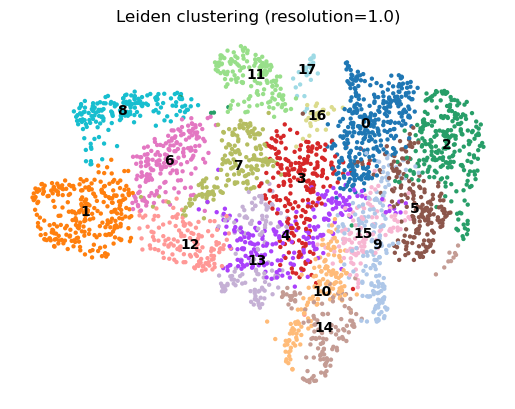

In [19]:

resolutions = np.round(np.arange(0.1, 1.01, 0.1), 1)

for res in resolutions:
    key = f'leiden_{res:.1f}'
    sc.tl.leiden(adata, resolution=res, key_added=key)
    
    sc.pl.umap(
        adata,
        color=key,
        title=f'Leiden clustering (resolution={res:.1f})',
        legend_loc='on data',
        frameon=False,
        show=True
    )